# Analyzing a known set of T2D genes for exon/promoter novelty

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
gwas_genes = pd.read_csv("../data_raw/SummarizedTable_GWASevidence_T2DGlycemicBetaCell.txt",  encoding="latin1", sep="\t")

In [4]:
t2d_genes = gwas_genes[gwas_genes["Traits"].str.contains("T2D")]

In [5]:
t2d_genes

,GeneName,Sources,Studies,Traits
6,ABCB8,pcHiC,Mahajan2022,T2D
7,ABCB9,pcHiC,Mahajan2022,T2D
8,ABCC8,"pcHiC,MAGMA,DEPICT","Mahajan2022,Lagou2023","T2D,RandomGlucose"
9,ABCC9,TIGEReQTL,Mahajan2018,T2D
11,ABHD6,MAGMA,Mahajan2022,T2D
...,...,...,...,...
1385,ZNF703,pcHiC,Mahajan2022,T2D
1389,ZNHIT3,TIGEReQTL,Mahajan2018,T2D
1390,ZSCAN29,MAGMA,Mahajan2022,T2D
1391,ZZEF1,MAGMA,Mahajan2022,T2D


In [7]:
t2d_genes["Studies"].unique()

array(['Mahajan2022', 'Mahajan2022,Lagou2023', 'Mahajan2018',
       'Mahajan2022,MAGIC_FI', 'Mahajan2022,MAGIC2021_FG,MAGIC2021_HbA1c',
       'Mahajan2022,MAGIC2021_FG,MAGIC_FI',
       'Mahajan2022,MAGIC_2hGlu,MadsenAL_xinsG30,MadsenAL_xinsdG30,MadsenAL_stumvoll,MadsenAL_cir,MadsenAL_bigair,MadsenAL_di',
       'Mahajan2022,MAGIC2021_FG,Mahajan2018,Lagou2023',
       'Mahajan2022,Mahajan2018',
       'Mahajan2022,MAGIC2021_FG,MAGIC2021_HbA1c,MAGIC_2hGlu,Mahajan2018,MAGIC_FI,Lagou2023',
       'Mahajan2022,MAGIC2021_HbA1c,Mahajan2018',
       'Mahajan2022,MAGIC2021_FG,Lagou2023',
       'Mahajan2022,MAGIC2021_HbA1c',
       'Mahajan2022,MAGIC2021_FG,MadsenAL_xinsG30,MadsenAL_xinsdG30,MadsenAL_stumvoll,MadsenAL_cir,MadsenAL_bigair,MadsenAL_di,Lagou2023',
       'Mahajan2022,Mahajan2018,Lagou2023',
       'Mahajan2022,MAGIC_FI,MadsenAL_xinsG30,MadsenAL_xinsdG30,MadsenAL_stumvoll,MadsenAL_cir,MadsenAL_bigair,MadsenAL_di,Lagou2023',
       'Mahajan2022,MAGIC2021_FG,MAGIC_2hGlu,MadsenAL_s

In [6]:
t2d_gene_names = list(t2d_genes["GeneName"].unique())

In [8]:
t2d_gene_names

['ABCB8',
 'ABCB9',
 'ABCC8',
 'ABCC9',
 'ABHD6',
 'ABO',
 'AC004069.2',
 'AC005019.3',
 'AC005355.2',
 'AC007386.4',
 'AC007690.1',
 'AC007796.1',
 'AC010336.1',
 'AC010883.5',
 'AC013463.2',
 'AC016559.1',
 'AC017002.2',
 'AC019181.2',
 'AC022431.1',
 'AC068831.10',
 'AC068831.3',
 'AC074117.10',
 'AC074391.1',
 'AC078852.1',
 'AC079602.1',
 'AC093609.1',
 'AC096670.3',
 'ACAD10',
 'ACOX2',
 'ACSL1',
 'ACTA1',
 'ACTR10',
 'ACVR1C',
 'ADAL',
 'ADAMTS9-AS2',
 'ADCY5',
 'ADRA2A',
 'AEBP1',
 'AF131216.5',
 'AGPAT6',
 'AIG1',
 'AKR1A1',
 'AL354993.1',
 'ANK1',
 'ANKDD1B',
 'ANKFY1',
 'ANKH',
 'AP000769.1',
 'AP001816.1',
 'AP3S2',
 'APIP',
 'APOC1',
 'APOE',
 'ARAP1',
 'ARHGAP19',
 'ARHGAP19-SLIT1',
 'ARID4A',
 'ARL15',
 'ARL6IP4',
 'ARMC2',
 'ASAH2B',
 'ASCC2',
 'ATG16L2',
 'ATG9B',
 'ATP2A3',
 'ATP5G1',
 'ATP6V0A1',
 'ATP8B2',
 'ATPAF2',
 'ATXN7',
 'AUTS2',
 'AXIN1',
 'BBIP1',
 'BCAR1',
 'BCL2',
 'BCL2L11',
 'BCL6',
 'BDH2',
 'BDNF-AS',
 'BHLHA15',
 'BMF',
 'BMP8A',
 'BOP1',
 'BPTF',
 '

In [9]:
len(t2d_gene_names)

805

## Do these genes have non-overlapping exons in a predicted CDS?

In [10]:
# Load CDS output of non-overlapping exons in predicted CDS
with open("../data_processed/ORFanage/orfanage_output_with_CDS_no_stop.pkl", "rb") as f:
    orfanage_output_with_CDS = pickle.load(f)

In [11]:
orfanage_transcripts = orfanage_output_with_CDS[orfanage_output_with_CDS["feature"] == "transcript"]
orfanage_transcripts = orfanage_transcripts.drop(columns=["is_non_overlapping", "is_unannotated", "CDS_matches_exon", "is_stop_in_cds"])
orfanage_transcripts.head()

,Chromosome,source,feature,Start,End,score,Strand,frame,transcript_id,Gene name
0,chrX,custom,transcript,2932983,2964288,.,-,.,PBT00439837,ARSL
20,chrX,custom,transcript,2933334,2964284,.,-,.,STRT02233988,ARSL
40,chrX,custom,transcript,7901989,7927413,.,-,.,STRT02228666,PNPLA4
58,chrX,custom,transcript,7918864,7927384,.,-,.,STRT02237178,PNPLA4
72,chrX,custom,transcript,7918904,7927441,.,-,.,STRT02253319,PNPLA4


In [12]:
len(orfanage_transcripts)

11074

In [13]:
orfanage_transcripts[orfanage_transcripts["Gene name"].isin(t2d_gene_names)]["Gene name"].unique()

array(['MACF1', 'HEYL', 'GPBP1L1', 'IPP', 'MAST2', 'PIK3R3', 'TSPAN1',
       'FAF1', 'PGM1', 'PTGFRN', 'MDM4', 'DSTYK', 'PROX1', 'VSNL1',
       'DNMT3A', 'DTNB', 'SNX17', 'IFT172', 'GCKR', 'ZNF512', 'CAMKMT',
       'GRB14', 'COBLL1', 'THUMPD3', 'RBM6', 'RFT1', 'ABHD6', 'PXK',
       'PRICKLE2', 'ROBO2', 'GAP43', 'ADCY5', 'SLC12A8', 'ZNF148',
       'MBNL1', 'SLC2A2', 'IGF2BP2', 'LPP', 'TFRC', 'CPLX1', 'RNF212',
       'SPON2', 'MAEA', 'WFS1', 'LCORL', 'MOB1B', 'TMEM150C', 'SCD5',
       'SMARCAD1', 'FBXW7', 'ACSL1', 'ANKH', 'ISL1', 'ARL15', 'POLK',
       'POC5', 'PDE8B', 'DMGDH', 'JMY', 'PAM', 'GIN1', 'PPIP5K2', 'NSD1',
       'MGAT1', 'HMGA1', 'GLP1R', 'KCNK16', 'GTPBP2', 'PDSS2', 'SOBP',
       'ARMC2', 'TRMT11', 'MED23', 'PEX7', 'IL20RA', 'AIG1', 'SLC22A3',
       'DGKB', 'GCK', 'GRB10', 'COBL', 'AUTS2', 'STEAP1', 'FAM185A',
       'FBXL13', 'BRAF', 'KCNH2', 'UBE3C', 'MFHAS1', 'ERI1', 'MSRA',
       'PINX1', 'GINS4', 'KAT6A', 'INTS8', 'NDUFAF6', 'LRP12', 'TRPS1',
       'EIF3H',

In [14]:
new_coding_exon_genes = set(orfanage_transcripts[orfanage_transcripts["Gene name"].isin(t2d_gene_names)]["Gene name"].unique())

In [15]:
orfanage_transcripts[orfanage_transcripts["Gene name"].isin(t2d_gene_names)]["Gene name"].nunique()

204

In [16]:
# Proportion of T2D genes that have novel exon
204/805

0.253416149068323

In [20]:
# Filter to T2D genes and exon features
orf_exons = orfanage_output_with_CDS[
    (orfanage_output_with_CDS["Gene name"].isin(t2d_gene_names)) &
    (orfanage_output_with_CDS["feature"] == "CDS") &
    (orfanage_output_with_CDS["CDS_matches_exon"] == True)
]

# Count unique exons per gene
exon_counts = (
    orf_exons.drop_duplicates(subset=["Start", "End", "Gene name"])
    .groupby("Gene name")
    .size()
    .sort_values(ascending=False)
)

In [21]:
exon_counts

Gene name
MYO3A     16
FAF1       9
ARL15      9
FBXL13     7
DTNB       7
          ..
WFS1       1
ZMIZ1      1
ZNF148     1
ZNF236     1
ZNF512     1
Length: 204, dtype: int64

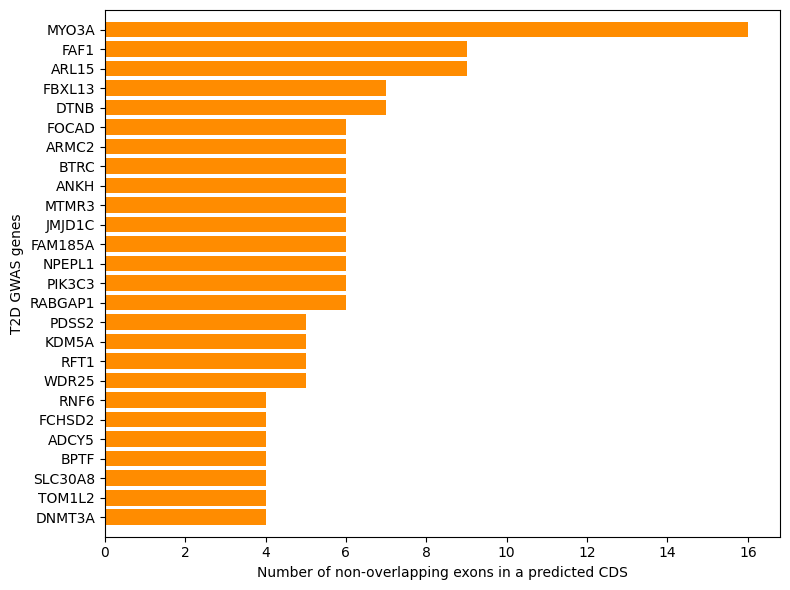

In [23]:
counts = exon_counts[exon_counts > 3]
#counts = exon_counts

plt.figure(figsize=(8, 6))
plt.barh(counts.index, counts.values, color="darkorange")



# use full vertical space
plt.yticks(range(len(counts)), counts.index)
plt.ylim(-1, len(counts))

# axes/labels
plt.xlabel("Number of non-overlapping exons in a predicted CDS")
plt.ylabel("T2D GWAS genes")

plt.gca().invert_yaxis()  # largest count at top
plt.tight_layout()
plt.show()

In [24]:
orf_exons[orf_exons["Gene name"] == "MYO3A"].sort_values(by="Start")

,Chromosome,source,feature,Start,End,score,Strand,frame,transcript_id,is_non_overlapping,is_unannotated,CDS_matches_exon,is_stop_in_cds,Gene name
164038,chr10,ORFanage,CDS,25955958,25956161,.,+,0,STRT00246998,False,False,True,False,MYO3A
164141,chr10,ORFanage,CDS,25955958,25956098,.,+,0,PBT00055552,False,False,True,False,MYO3A
164199,chr10,ORFanage,CDS,25955958,25956098,.,+,0,STRT00227790,False,False,True,False,MYO3A
164157,chr10,ORFanage,CDS,25955958,25956161,.,+,0,STRT00254542,False,False,True,False,MYO3A
164461,chr10,ORFanage,CDS,25955958,25956098,.,+,0,STRT00311836,False,False,True,False,MYO3A
164506,chr10,ORFanage,CDS,25955958,25956161,.,+,0,STRT00234630,False,False,True,False,MYO3A
164343,chr10,ORFanage,CDS,25955958,25956098,.,+,0,STRT00273667,False,False,True,False,MYO3A
164262,chr10,ORFanage,CDS,25955958,25956098,.,+,0,STRT00253760,False,False,True,False,MYO3A
164747,chr10,ORFanage,CDS,25955958,25956161,.,+,0,STRT00230682,False,False,True,False,MYO3A
164776,chr10,ORFanage,CDS,25955958,25956098,.,+,0,STRT00254776,False,False,True,False,MYO3A


In [25]:
orf_exons[orf_exons["Gene name"] == "MYO3A"][["Start", "End"]].drop_duplicates().sort_values(by="Start")

,Start,End
164038,25955958,25956161
164141,25955958,25956098
164399,25956158,25956196
164228,25960701,25960859
164491,25966995,25967189
164734,25973932,25973961
164243,25975425,25975679
164760,25981813,25981902
164633,26054856,26054890
164803,26069622,26069666


## Do any of these genes have an unannotated TSS?

In [27]:
combined_df = pd.read_csv( '../data_processed/curated_HIT.tsv', sep='\t')

/tmp/19452335/ipykernel_867317/558083981.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv( '../data_processed/curated_HIT.tsv', sep='\t')


In [28]:
combined_df[(combined_df["Gene name"].isin(t2d_gene_names)) & 
            (combined_df["TSS distance category"] == ">100bp")]["Gene name"].nunique()

279

In [29]:
novel_promoter_genes = set(combined_df[(combined_df["Gene name"].isin(t2d_gene_names)) & 
            (combined_df["TSS distance category"] == ">100bp")]["Gene name"].unique())

In [30]:
combined_df[(combined_df["Gene name"].isin(t2d_gene_names)) & 
            (combined_df["TSS distance category"] == ">100bp")]["Gene name"].unique()

array(['POMGNT1', 'MACF1', 'AKR1A1', 'TSPAN1', 'FAF1', 'RPS24', 'PTEN',
       'PDCD4', 'JMJD1C', 'TCF7L2', 'CD81', 'ABCC8', 'PHF21A', 'LTBP3',
       'NUCB2', 'KCNQ1', 'SCYL1', 'CCND1', 'TRPM5', 'RELA', 'HYOU1',
       'ARAP1', 'YIF1A', 'DIP2B', 'ABCC9', 'MEG3', 'SNX1', 'TP53BP1',
       'VPS13C', 'SIN3A', 'TSPAN3', 'TCF12', 'RCCD1', 'CMIP', 'BCAR1',
       'CTRB2', 'CLUAP1', 'ATP6V0A1', 'NAGLU', 'NFE2L1', 'KPNA2',
       'CAMKK1', 'ATP2A3', 'ZZEF1', 'SPATA20', 'HNF1B', 'RAI1', 'CALR',
       'ZC3H4', 'SNX17', 'GTF3C2', 'PREPL', 'RAB1A', 'GPN1', 'GNAS',
       'GDAP1L1', 'MTMR3', 'EP300', 'LPP', 'TFRC', 'RBM6', 'ROBO2',
       'ST6GAL1', 'ZNF148', 'HNRNPDL', 'WFS1', 'NFKB1', 'SCD5', 'UBE2D3',
       'ISL1', 'PAM', 'ANKH', 'GLP1R', 'POLD2', 'AEBP1', 'UBE3C', 'GCK',
       'KCNH2', 'ERLIN2', 'SLC30A8', 'RAD21', 'FOCAD', 'GLIS3', 'UBAP2',
       'SEC16A', 'PIK3C2B', 'HEYL', 'DSTYK', 'PROX1', 'PTGFRN', 'CD101',
       'PIK3R3', 'CPEB3', 'ZMIZ1', 'OPTN', 'PLEKHA1', 'MYO3A', 'ARHGAP19',
   

In [31]:
# % of genes from T2D gene list that have an unannotated promoter
279/805 * 100

34.6583850931677

In [33]:
# How many of the novel TSSs are the main TSS
combined_df[(combined_df["Gene name"].isin(t2d_gene_names)) & 
            (combined_df["TSS distance category"] == ">100bp") &
            (combined_df["TSS_type"] == "main TSS")]["TSS_name"].nunique()

45

/tmp/19452335/ipykernel_867317/2899440806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tss["annotation_status"] = df_tss["TSS distance category"].apply(


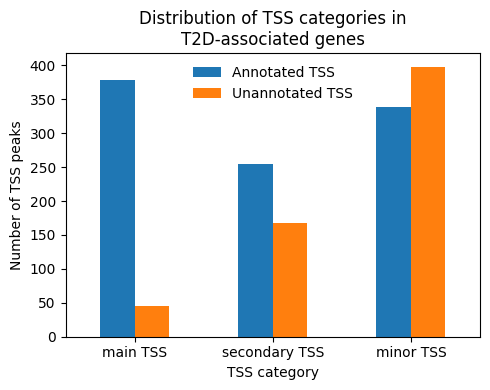

In [37]:
df_tss = combined_df[combined_df["Gene name"].isin(t2d_gene_names)]

# Define annotation status
df_tss["annotation_status"] = df_tss["TSS distance category"].apply(
    lambda x: "Unannotated TSS" if x == ">100bp" else "Annotated TSS"
)

# Count TSSs by category and annotation status
counts = (
    df_tss.groupby(["TSS_type", "annotation_status"])["peak_name"]
    .nunique()
    .reset_index(name="count")
)


pivot = counts.pivot(index="TSS_type", columns="annotation_status", values="count").fillna(0)

pivot = pivot.loc[["main TSS", "secondary TSS", "minor TSS"]]  

pivot.plot(kind="bar", figsize=(5,4))
plt.ylabel("Number of TSS peaks")
plt.xlabel("TSS category")
plt.title("Distribution of TSS categories in\nT2D-associated genes")
plt.xticks(rotation=0)
plt.legend(loc="upper center", frameon=False)

plt.tight_layout()
plt.show()

In [38]:
counts

,TSS_type,annotation_status,count
0,main TSS,Annotated TSS,379
1,main TSS,Unannotated TSS,45
2,minor TSS,Annotated TSS,339
3,minor TSS,Unannotated TSS,398
4,secondary TSS,Annotated TSS,255
5,secondary TSS,Unannotated TSS,167
6,unique TSS,Annotated TSS,199
7,unique TSS,Unannotated TSS,8


In [39]:
combined_df[(combined_df["Gene name"].isin(t2d_gene_names)) & 
            (combined_df["TSS_type"] == "main TSS") & 
            (combined_df["TSS distance category"] == ">100bp")]["Gene name"].unique()

array(['TSPAN1', 'JMJD1C', 'CCND1', 'TRPM5', 'DIP2B', 'SIN3A', 'TSPAN3',
       'NAGLU', 'ATP2A3', 'GTF3C2', 'GNAS', 'LPP', 'ST6GAL1', 'SCD5',
       'PAM', 'UBE3C', 'KCNH2', 'FAF1', 'PTGFRN', 'KL', 'CDK12', 'SLC5A1',
       'MOB1B', 'PDE8B', 'JAZF1', 'CDKN2A', 'CDKN2C', 'PCBD1', 'SLC35C1',
       'MAPK8IP1', 'KLHL42', 'SPRY2', 'DLK1', 'CBX1', 'EP300', 'PIM3',
       'ADCY5', 'STEAP1', 'GIGYF1', 'ZMIZ1', 'P2RY1', 'ATG9B', 'MAFA',
       'DMRTA1', 'RAB1A'], dtype=object)

In [41]:
combined_df[(combined_df["Gene name"] == "MAFA") & 
            (combined_df["TSS_type"] == "main TSS") & 
            (combined_df["TSS distance category"] == ">100bp")]

,transcript_id,chr,exons,matched_to,category,unannotated_exons,Strand,summarized_category,ref_id,stripped_ref_id,Gene stable ID,Gene name,Gene type,gene_category,peak_name,peak_type,mean_TPM_ref,log2_tx_exp,gene_exp_ref,relative_tx_exp,TSS_TPM_per_gene,Relative TSS usage,TSS_type,TSS_start,TSS_end,distance_to_closest_TSS,closest_TSS_ref_id,TSS distance category,TSS_name
335111,ENST00000333480.2,chr8,"[(143428060, 143430406)]",NaN,Fully unannotated transcripts with overlapping...,NaN,-,Unannotated transcripts without any annotated ...,ENST00000333480.3,ENST00000333480,ENSG00000182759,MAFA,protein_coding,protein_coding,chr8:143430333-143430440_Peak_74667,Permissive,47.639525,5.574087,48.156655,0.989262,47.639525,0.989262,main TSS,143430333.0,143430440.0,292.0,ENST00000333480.3,>100bp,P74667_U


In [42]:
counts["count"].sum()

np.int64(1790)

In [43]:
counts.groupby("annotation_status")["count"].sum()

annotation_status
Annotated TSS      1172
Unannotated TSS     618
Name: count, dtype: int64

In [45]:
# % of unannotated TSSs
618/1790 *100

34.52513966480447

## Do any of these genes have a new first exon from an unannotated TSS that is in predicted CDS?

In [46]:
# Load CDS output of non-pverlapping exons in predicted CDS
with open("../data_processed/ORFanage/orfanage_output_with_CDS_first_exons.pkl", "rb") as f:
    orfanage_output_with_CDS_first_exons = pickle.load(f)

In [47]:
orfanage_output_with_CDS_first_exons[orfanage_output_with_CDS_first_exons["transcript_id"] == "PBT00346575"]

,Chromosome,source,feature,Start,End,score,Strand,frame,attribute,transcript_id,is_first_exon,CDS_matches_exon
41270,chr5,custom,transcript,77180304,77427036,.,+,.,"transcript_id ""PBT00346575""; gene_id ""ENSG0000...",PBT00346575,False,False
41271,chr5,custom,exon,77180304,77180486,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,True,False
41272,chr5,custom,exon,77311994,77312053,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,False,False
41273,chr5,custom,exon,77325539,77325729,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,False,False
41274,chr5,custom,exon,77328998,77329057,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,False,False
41275,chr5,custom,exon,77331402,77331459,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,False,False
41276,chr5,custom,exon,77337227,77337315,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,False,False
41277,chr5,custom,exon,77344853,77344931,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,False,False
41278,chr5,custom,exon,77351065,77351153,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,False,False
41279,chr5,custom,exon,77353346,77353406,.,+,.,"transcript_id ""PBT00346575"";",PBT00346575,False,False


In [48]:
first_exon_orfanage_transcripts = orfanage_output_with_CDS_first_exons[orfanage_output_with_CDS_first_exons["feature"] == "transcript"]
first_exon_orfanage_transcripts = first_exon_orfanage_transcripts.drop(columns=["is_first_exon", "CDS_matches_exon"])
first_exon_orfanage_transcripts.head()

,Chromosome,source,feature,Start,End,score,Strand,frame,attribute,transcript_id
176,chr1,custom,transcript,15724178,15734767,.,+,.,"transcript_id ""PBT00032272""; gene_id ""ENSG0000...",PBT00032272
3242,chr1,custom,transcript,43558982,43622357,.,+,.,"transcript_id ""PBT00033330""; gene_id ""ENSG0000...",PBT00033330
3303,chr1,custom,transcript,43558983,43622842,.,+,.,"transcript_id ""PBT00033331""; gene_id ""ENSG0000...",PBT00033331
3758,chr1,custom,transcript,74734334,74759975,.,+,.,"transcript_id ""STRT00085127""; gene_id ""ENSG000...",STRT00085127
5415,chr1,custom,transcript,147612708,147614742,.,+,.,"transcript_id ""STRT00128650""; gene_id ""ENSG000...",STRT00128650


In [49]:
def split_attributes(df, *attribute_type):
    """split attribute of a gtf into separate columns"""
    try: 
        l_attributes = df.strip(';').split('; ')
        attribute_position = [i for i, x in enumerate(l_attributes) if x.startswith(attribute_type)]
        attribute = l_attributes[attribute_position[0]].split(' ')[1].strip('"')
        return attribute
    except Exception:
        return np.nan

In [50]:
first_exon_orfanage_transcripts.loc[:, 'gene_name'] = first_exon_orfanage_transcripts['attribute'].apply(split_attributes, args=("gene_name",))
first_exon_orfanage_transcripts.head()

,Chromosome,source,feature,Start,End,score,Strand,frame,attribute,transcript_id,gene_name
176,chr1,custom,transcript,15724178,15734767,.,+,.,"transcript_id ""PBT00032272""; gene_id ""ENSG0000...",PBT00032272,PLEKHM2
3242,chr1,custom,transcript,43558982,43622357,.,+,.,"transcript_id ""PBT00033330""; gene_id ""ENSG0000...",PBT00033330,PTPRF
3303,chr1,custom,transcript,43558983,43622842,.,+,.,"transcript_id ""PBT00033331""; gene_id ""ENSG0000...",PBT00033331,PTPRF
3758,chr1,custom,transcript,74734334,74759975,.,+,.,"transcript_id ""STRT00085127""; gene_id ""ENSG000...",STRT00085127,TYW3
5415,chr1,custom,transcript,147612708,147614742,.,+,.,"transcript_id ""STRT00128650""; gene_id ""ENSG000...",STRT00128650,BCL9


In [51]:
len(first_exon_orfanage_transcripts)

546

In [52]:
first_exon_orfanage_transcripts[first_exon_orfanage_transcripts["gene_name"].isin(t2d_gene_names)]["gene_name"].unique()

array(['PIK3R3', 'ADCY5', 'PDE8B', 'EIF3H', 'CCND1', 'TRPM5', 'BRAP',
       'WDR25', 'ZZEF1'], dtype=object)

In [53]:
novel_first_exon_genes = set(first_exon_orfanage_transcripts[first_exon_orfanage_transcripts["gene_name"].isin(t2d_gene_names)]["gene_name"].unique())

In [54]:
first_exon_orfanage_transcripts[first_exon_orfanage_transcripts["gene_name"].isin(t2d_gene_names)]

,Chromosome,source,feature,Start,End,score,Strand,frame,attribute,transcript_id,gene_name
10789,chr1,custom,transcript,46040155,46131821,.,-,.,"transcript_id ""STRT00169350""; gene_id ""ENSG000...",STRT00169350,PIK3R3
34020,chr3,custom,transcript,123296826,123411301,.,-,.,"transcript_id ""STRT01547919""; gene_id ""ENSG000...",STRT01547919,ADCY5
41270,chr5,custom,transcript,77180304,77427036,.,+,.,"transcript_id ""PBT00346575""; gene_id ""ENSG0000...",PBT00346575,PDE8B
41313,chr5,custom,transcript,77180304,77427036,.,+,.,"transcript_id ""PBT00346576""; gene_id ""ENSG0000...",PBT00346576,PDE8B
41358,chr5,custom,transcript,77180351,77413498,.,+,.,"transcript_id ""STRT01749322""; gene_id ""ENSG000...",STRT01749322,PDE8B
74450,chr8,custom,transcript,116644831,116730223,.,-,.,"transcript_id ""STRT02059115""; gene_id ""ENSG000...",STRT02059115,EIF3H
94867,chr11,custom,transcript,69641999,69653150,.,+,.,"transcript_id ""STRT00352723""; gene_id ""ENSG000...",STRT00352723,CCND1
94899,chr11,custom,transcript,69642052,69654473,.,+,.,"transcript_id ""PBT00081729""; gene_id ""ENSG0000...",PBT00081729,CCND1
98091,chr11,custom,transcript,2404516,2416774,.,-,.,"transcript_id ""STRT00382803""; gene_id ""ENSG000...",STRT00382803,TRPM5
98169,chr11,custom,transcript,2404518,2416829,.,-,.,"transcript_id ""PBT00082955""; gene_id ""ENSG0000...",PBT00082955,TRPM5


In [55]:
resulting_ids = first_exon_orfanage_transcripts[first_exon_orfanage_transcripts["gene_name"].isin(t2d_gene_names)]["transcript_id"].unique()
len(resulting_ids)

16

In [56]:
first_exon_orfanage_transcripts[first_exon_orfanage_transcripts["gene_name"] == "TRPM5"]

,Chromosome,source,feature,Start,End,score,Strand,frame,attribute,transcript_id,gene_name
98091,chr11,custom,transcript,2404516,2416774,.,-,.,"transcript_id ""STRT00382803""; gene_id ""ENSG000...",STRT00382803,TRPM5
98169,chr11,custom,transcript,2404518,2416829,.,-,.,"transcript_id ""PBT00082955""; gene_id ""ENSG0000...",PBT00082955,TRPM5
98206,chr11,custom,transcript,2404518,2416829,.,-,.,"transcript_id ""PBT00082954""; gene_id ""ENSG0000...",PBT00082954,TRPM5
98336,chr11,custom,transcript,2412521,2416781,.,-,.,"transcript_id ""STRT00403519""; gene_id ""ENSG000...",STRT00403519,TRPM5


In [57]:
combined_df[(combined_df["transcript_id"].isin(resulting_ids)) & (combined_df["Gene name"] == "PDE8B")]

,transcript_id,chr,exons,matched_to,category,unannotated_exons,Strand,summarized_category,ref_id,stripped_ref_id,Gene stable ID,Gene name,Gene type,gene_category,peak_name,peak_type,mean_TPM_ref,log2_tx_exp,gene_exp_ref,relative_tx_exp,TSS_TPM_per_gene,Relative TSS usage,TSS_type,TSS_start,TSS_end,distance_to_closest_TSS,closest_TSS_ref_id,TSS distance category,TSS_name
110820,PBT00346575,chr5,"[(77180304, 77180486), (77311994, 77312053), (...",NaN,Transcripts with annotated exons and non-overl...,"[(77180304, 77180486)]",+,Unannotated transcripts with annotated and una...,ENST00000646262.1,ENST00000646262,ENSG00000284762,PDE8B,protein_coding,protein_coding,chr5:77180298-77180309_Peak_60445,Robust,0.371696,-1.427806,0.668810,0.555757,0.502180,0.750856,main TSS,77180298.0,77180309.0,30140.0,ENST00000505926.5,>100bp,P60445_U
110821,PBT00346576,chr5,"[(77180304, 77180486), (77311994, 77312053), (...",NaN,Transcripts with annotated exons and non-overl...,"[(77180304, 77180486)]",+,Unannotated transcripts with annotated and una...,ENST00000646262.1,ENST00000646262,ENSG00000284762,PDE8B,protein_coding,protein_coding,chr5:77180298-77180309_Peak_60445,Robust,0.130484,-2.938051,0.668810,0.195099,0.502180,0.750856,main TSS,77180298.0,77180309.0,30140.0,ENST00000505926.5,>100bp,P60445_U
113144,STRT01749322,chr5,"[(77180351, 77180486), (77311997, 77312053), (...",NaN,Transcripts with annotated exons and non-overl...,"[(77180351, 77180486), (77311997, 77312053), (...",+,Unannotated transcripts with annotated and una...,ENST00000264917.10,ENST00000264917,ENSG00000113231,PDE8B,protein_coding,protein_coding,chr5:77180298-77180309_Peak_60445,Robust,0.315635,-1.663672,10.421247,0.030288,0.315635,0.030288,minor TSS,77180298.0,77180309.0,30140.0,ENST00000505926.5,>100bp,P60445_U


In [59]:
gencode_v47 = pd.read_csv(
    "../data_raw/gencode.v47.tsv",
    sep="\t",
    dtype=str)
gencode_v47

,seqname,source,feature,start,end,score,strand,frame,gene_id,transcript_id,gene_type,gene_name,transcript_type,transcript_name,exon_number,exon_id,level,tag,transcript_support_level,havana_transcript,hgnc_id,ont,havana_gene,protein_id,ccdsid
0,chr1,HAVANA,exon,11121,11211,.,+,.,ENSG00000290825.2,ENST00000832824.1,lncRNA,DDX11L16,lncRNA,DDX11L16-260,1,ENSE00004248723.1,2,TAGENE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,HAVANA,exon,12010,12227,.,+,.,ENSG00000290825.2,ENST00000832824.1,lncRNA,DDX11L16,lncRNA,DDX11L16-260,2,ENSE00004248735.1,2,TAGENE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,HAVANA,exon,12613,12721,.,+,.,ENSG00000290825.2,ENST00000832824.1,lncRNA,DDX11L16,lncRNA,DDX11L16-260,3,ENSE00003582793.1,2,TAGENE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,HAVANA,exon,13453,14413,.,+,.,ENSG00000290825.2,ENST00000832824.1,lncRNA,DDX11L16,lncRNA,DDX11L16-260,4,ENSE00004248730.1,2,TAGENE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,HAVANA,exon,11125,11211,.,+,.,ENSG00000290825.2,ENST00000832825.1,lncRNA,DDX11L16,lncRNA,DDX11L16-261,1,ENSE00004248721.1,2,TAGENE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155000,chrM,ENSEMBL,exon,14149,14673,.,-,.,ENSG00000198695.2,ENST00000361681.2,protein_coding,MT-ND6,protein_coding,MT-ND6-201,1,ENSE00001434974.2,3,appris_principal_1,NaN,NaN,HGNC:7462,NaN,NaN,ENSP00000354665.2,NaN
2155001,chrM,ENSEMBL,exon,14674,14742,.,-,.,ENSG00000210194.1,ENST00000387459.1,Mt_tRNA,MT-TE,Mt_tRNA,MT-TE-201,1,ENSE00001544476.1,3,Ensembl_canonical,NaN,NaN,HGNC:7479,NaN,NaN,NaN,NaN
2155002,chrM,ENSEMBL,exon,14747,15887,.,+,.,ENSG00000198727.2,ENST00000361789.2,protein_coding,MT-CYB,protein_coding,MT-CYB-201,1,ENSE00001436074.2,3,appris_principal_1,NaN,NaN,HGNC:7427,NaN,NaN,ENSP00000354554.2,NaN
2155003,chrM,ENSEMBL,exon,15888,15953,.,+,.,ENSG00000210195.2,ENST00000387460.2,Mt_tRNA,MT-TT,Mt_tRNA,MT-TT-201,1,ENSE00001544475.2,3,Ensembl_canonical,NaN,NaN,HGNC:7499,NaN,NaN,NaN,NaN


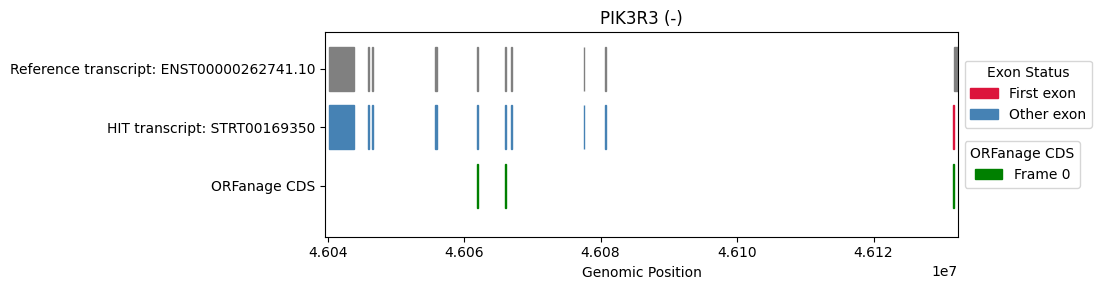

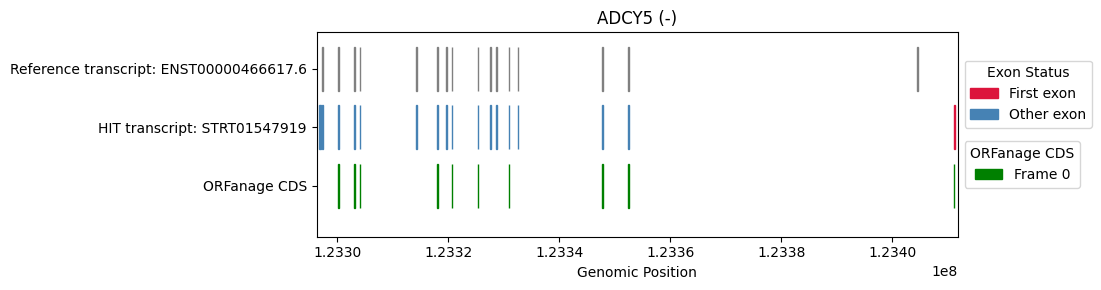

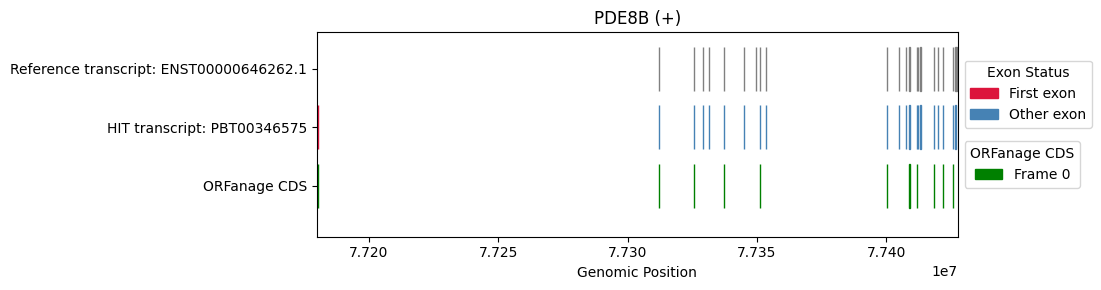

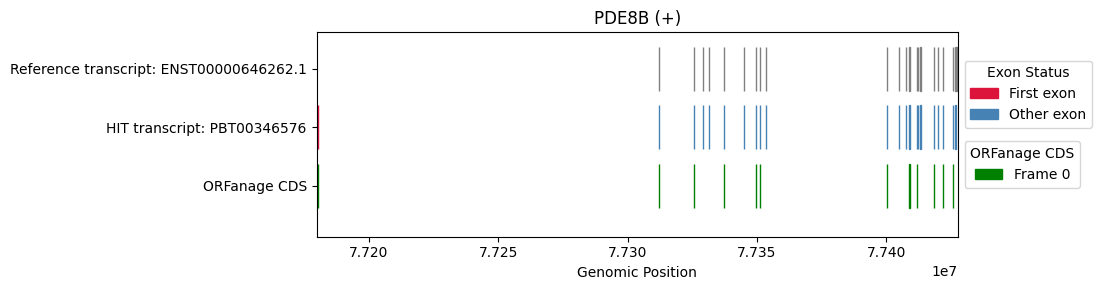

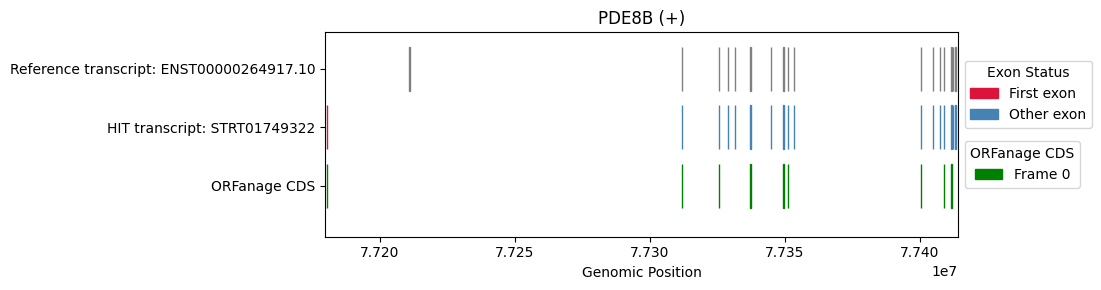

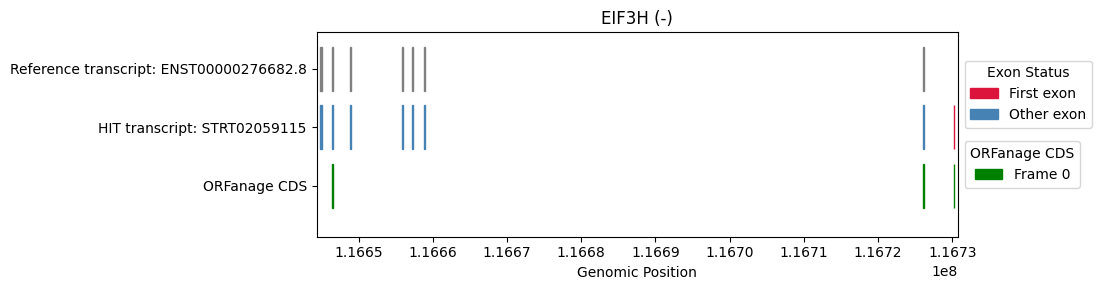

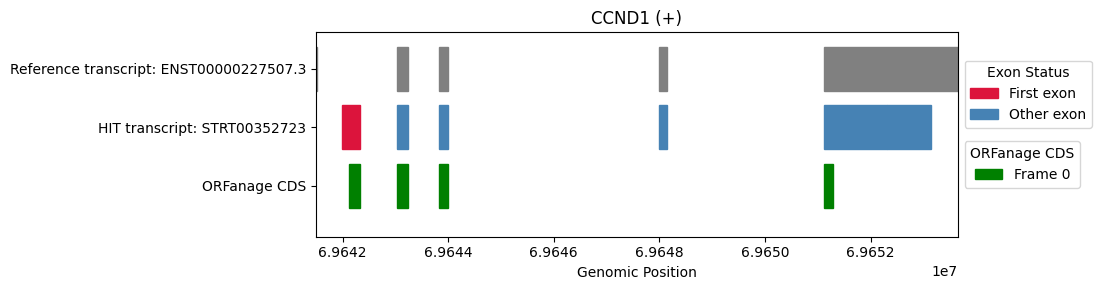

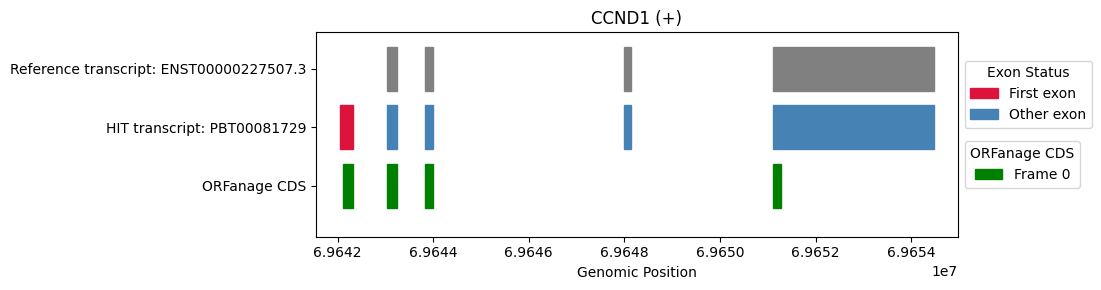

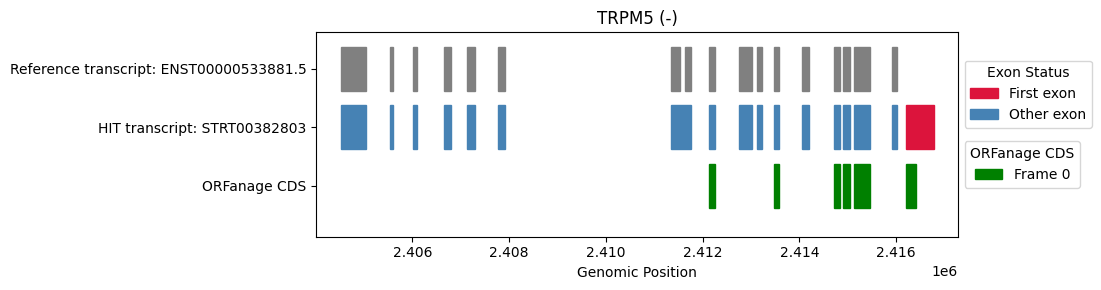

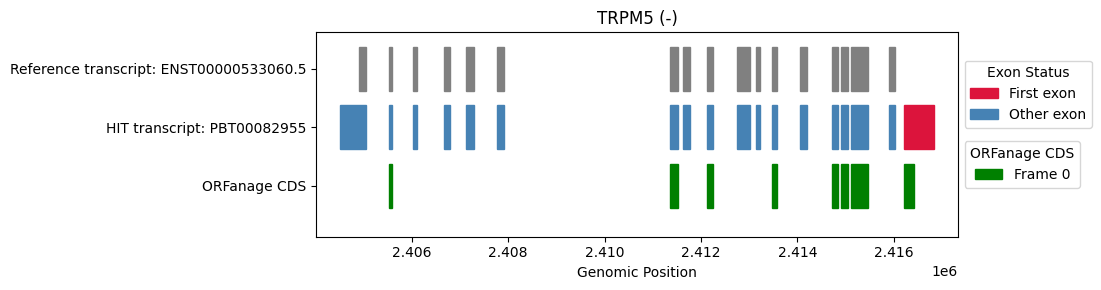

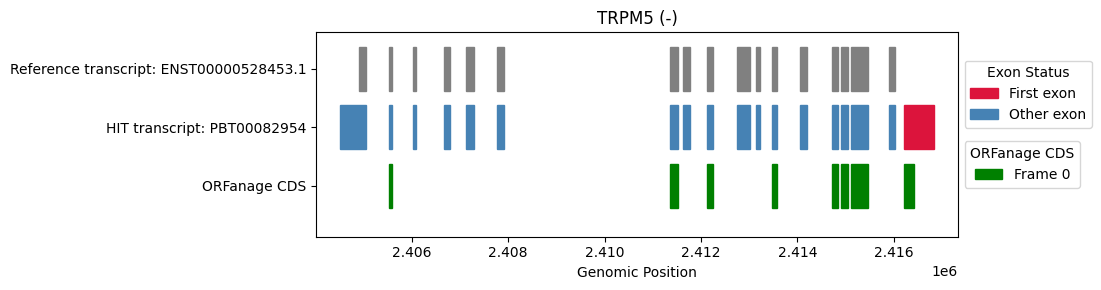

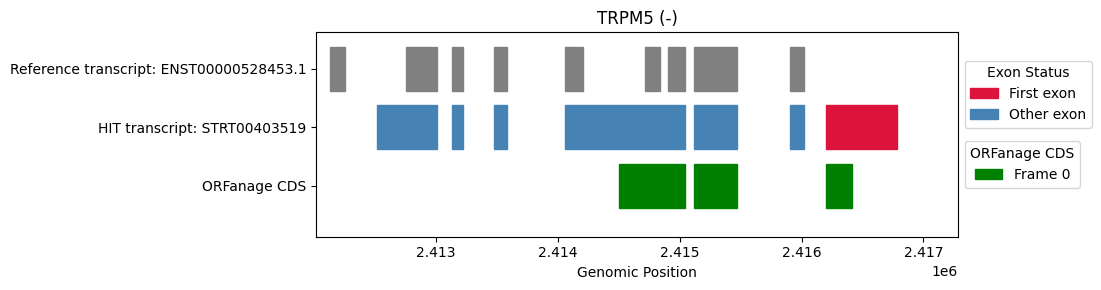

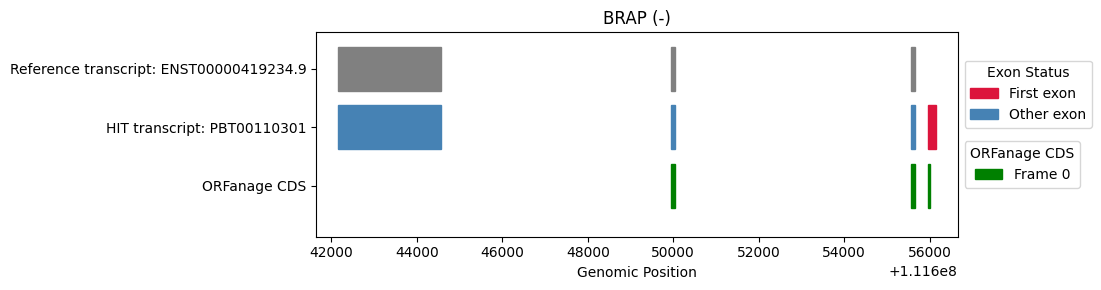

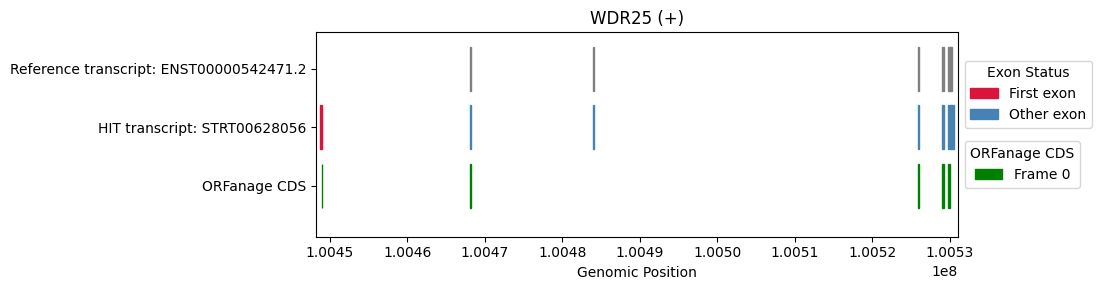

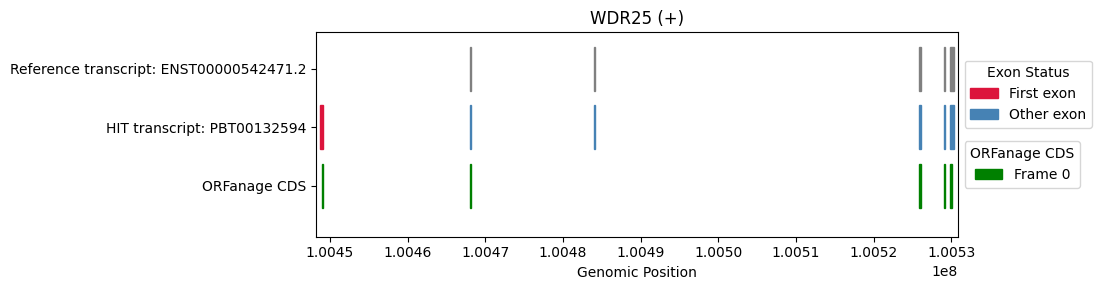

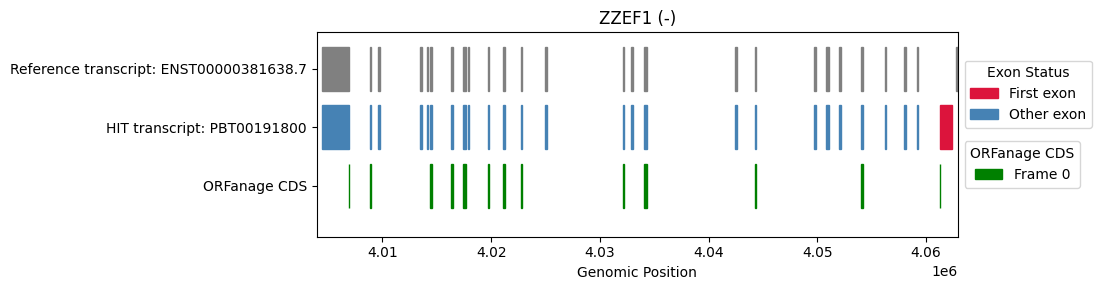

In [61]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

for transcript_id in resulting_ids:

    frame_colors = {
        "0": "green",
    }

    exon_colors = {
        "First exon": "crimson",
        "Other exon": "steelblue"
    }
    
    
    exons = orfanage_output_with_CDS_first_exons[(orfanage_output_with_CDS_first_exons["feature"] == "exon") & (orfanage_output_with_CDS_first_exons["transcript_id"] == transcript_id)]
    cds = orfanage_output_with_CDS_first_exons[(orfanage_output_with_CDS_first_exons["feature"] == "CDS") & (orfanage_output_with_CDS_first_exons["transcript_id"] == transcript_id) ]
    
    
    # Get ref transcript
    ref_id = combined_df[combined_df["transcript_id"] == transcript_id]["ref_id"].iloc[0]
    ref_transcript = gencode_v47[gencode_v47['transcript_id'] == ref_id]
    ref_transcript = ref_transcript[["start", "end", "transcript_id"]]
    ref_transcript["start"] = ref_transcript["start"].astype(int)
    ref_transcript["end"] = ref_transcript["end"].astype(int)
    
    
    fig, ax = plt.subplots(figsize=(11, 3))
    
    
    
    # Plot ref
    for _, row in ref_transcript.iterrows():
        ax.add_patch(
            plt.Rectangle(
                (row["start"], 0.8), row["end"] - row["start"], 0.3,
                edgecolor="grey",
                facecolor="grey"
            )
        )
    
    
    # Plot exons
    for _, row in exons.iterrows():
        if row["is_first_exon"]:
            color = "crimson"
        else:
            color = "steelblue"
    
        ax.add_patch(
            plt.Rectangle(
                (row["Start"], 0.4), row["End"] - row["Start"], 0.3,
                edgecolor=color,
                facecolor=color
            )
        )
    
        
    
    # Plot ORFanage CDS 
    for _, row in cds.iterrows():
        color = frame_colors.get(row["frame"])
        ax.add_patch(
            plt.Rectangle(
                (row["Start"], 0.0), row["End"] - row["Start"], 0.3,
                edgecolor=color,
                facecolor=color
            )
        )
    
    
    cds_legend_elements = [
        Patch(facecolor=color, edgecolor=color, label=f'Frame {frame}')
        for frame, color in frame_colors.items()
    ]
    
    
    
    exon_legend_elements = [
        Patch(facecolor=color, edgecolor=color, label=label)
        for label, color in exon_colors.items()
    ]
    exon_legend = ax.legend(handles=exon_legend_elements, loc='lower left', bbox_to_anchor=(1, 0.5), title='Exon Status')
    cds_legend = ax.legend(handles=cds_legend_elements, loc='upper left', bbox_to_anchor=(1, 0.5), title='ORFanage CDS')
    ax.add_artist(exon_legend) 
    
    ax.set_xlim(exons["Start"].min() - 500, exons["End"].max() + 500)
    # ax.set_xlim(21000000, 21200000)
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0.15, 0.55, 0.95])
    ax.set_yticklabels(["ORFanage CDS", f"HIT transcript: {transcript_id}", f"Reference transcript: {ref_id}"])
    ax.set_xlabel("Genomic Position")
    plt.title(f"{combined_df.loc[combined_df['transcript_id'] == transcript_id, 'Gene name'].iloc[0]} ({combined_df.loc[combined_df['transcript_id'] == transcript_id, 'Strand'].iloc[0]})")
    
    plt.tight_layout()
    plt.show()


In [62]:
import matplotlib as mpl
from matplotlib import font_manager

font_path = "../data_raw/fonts/LatinmodernmathRegular.otf"  
font_manager.fontManager.addfont(font_path)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
font = {'family' : 'Latin Modern Math',
       'weight' : 'normal',
       'size'   : 10}

mpl.rc('font', **font)

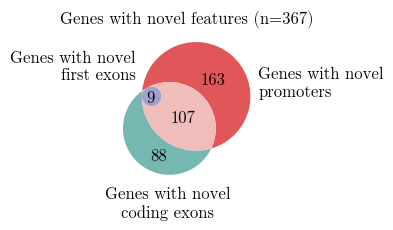

In [63]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

colors = ['#3B82F6', '#E15759', '#76B7B2']

plt.figure(figsize=(3.7,3.7))
v = venn3(
    [novel_first_exon_genes, novel_promoter_genes, new_coding_exon_genes],
    set_labels=('Genes with novel\nfirst exons', 'Genes with novel\npromoters', 'Genes with novel\ncoding exons'),
    set_colors=colors,  
    alpha=1
)

label_colours = ['#5F5F8A', '#B34247', '#55918C']
# Style set labels
for i, text in enumerate(v.set_labels):
    if text:
        text.set_fontsize(12)
        #text.set_color(label_colours[i])
        text.set_color('black')

first_label = v.set_labels[0]
x, y = first_label.get_position()
first_label.set_position((x * 1.3, y * 1.3))

second_label = v.set_labels[1]
x, y = second_label.get_position()
second_label.set_position((x * 1.9, y * 0.2))

third_label = v.set_labels[2]
x, y = third_label.get_position()
third_label.set_position((x * 1.1, y * 1.1))

offsets = [
    (0, 0), 
    (-0.04, -0.09),   
    (10, 0),  
    (0.1, -0.02), 
    (0, 0),
    (0.1, -0.1), 
    (-0.06, 0.02)     
]

for i, text in enumerate(v.subset_labels):
    if text:
        x, y = text.get_position()
        dx, dy = offsets[i]
        text.set_position((x + dx, y + dy))
        text.set_fontsize(12)

# Remove outer box and tighten layout
plt.box(False)
plt.title(f"Genes with novel features (n=367)", fontsize=12)
plt.tight_layout()
plt.savefig("figures/venn_2.pdf", bbox_inches='tight', dpi=300)
plt.show()


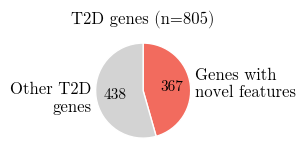

In [64]:
# Compute totals
total_t2d = len(t2d_gene_names)
unique_novel_genes = set(novel_first_exon_genes) | set(novel_promoter_genes) | set(new_coding_exon_genes)
other_genes = total_t2d - len(unique_novel_genes)

counts = [len(unique_novel_genes), other_genes]
labels = ['Genes with\nnovel features', 'Other T2D\ngenes']
colors = ['#F26B5E', 'lightgrey']  # red highlight + light grey

# Create donut chart
fig, ax = plt.subplots(figsize=(3, 3))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    autopct=lambda p: f"{int(round(p * total_t2d / 100))}",
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=1, edgecolor='white')
)

# Style adjustments
plt.setp(texts, size=12)
plt.setp(autotexts, size=11, color='black', weight='bold', ha='center')

# Add title
ax.set_title(f"T2D genes (n={total_t2d})", fontsize=12)

plt.tight_layout()
plt.savefig("figures/venn_1.pdf", bbox_inches='tight', dpi=300)
plt.show()
